## Tracking sulfide saturation during magma evolution
- This Jupyter Notebook shows how to use the various functionalities of PySCSS to track sulfide saturation during magma evolution
- This work is published as Liu et al. (in prep). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySulfSat as ss
import Thermobar as pt
pd.options.display.max_columns = None

In [3]:
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

## 1. Load sulfide data

In [4]:
Sulfide_in=pd.read_excel('Liu_Sulf_Compp.xlsx')
Sulfide_in.head()

,Sample,Sulfide,Averaging method,S,Fe,Ni,Cu,Fe/(Fe+Cu+Ni)
0,H14,H14_S1,average (n=3),34.365900,49.914425,2.323820,13.395820,0.760496
1,H14,H14_S2,average (n=3),34.691202,50.071840,2.474618,12.762410,0.766693
2,H14,H14_S3,single,35.557799,56.234839,2.981762,5.225494,0.872641
3,H14,H14_S4,average (n=3),33.705771,50.447033,2.400133,13.447063,0.760957
4,H14,H14_S5,average (n=3),32.949899,45.135301,2.868397,19.046367,0.673158


In [5]:
H14_Sulf=Sulfide_in.loc[Sulfide_in['Sample']=="H14"]

## 2. Load best fit liquid line of descent 
- This data is a Petrolog model
- The addition of the Liq suffix might seem a bit odd, but this allows use of liquid-only thermometers from the Python3 Thermobarometry tool Thermobar

In [6]:
Liqs=ss.import_data('Model9_BaliOnlyLang_Closedsystem_32kbar_NiCu_02.xlsx', 
            Petrolog=True)
Liqs.head()
## Because Ni and Cu are treated as trace elemnets, we can adjust their concentrations by a consatnt
Liqs['Ni_Liq_ppm']=Liqs['Ni_Liq_ppm']*1.1
Liqs['Cu_Liq_ppm']=Liqs['Cu_Liq_ppm']*(8/9)

We have replaced all missing liquid oxides and strings with zeros. 


In [7]:
Liqs['Ni_Liq_ppm'][0]

221.98000000000002

In [8]:
Liqs['Cu_Liq_ppm'][0]

80.71111111111111

## 3. Loading in measured data to compare to models
- Here we load in matrix glasses and melt inclusion compositions, again, all data from Liu et al. (in prep).

In [9]:
# Melt inclusions from Bali et al.
BMI=pd.read_excel('HoluMIs.xlsx', sheet_name=' 3.Bali Supplement')
# Matrix glasses from Liu et al. (in prep)
LG=pd.read_excel('HoluMIs.xlsx', sheet_name='4.Liu Matrix Glass Data')

In [10]:
LG_14=LG.loc[LG['Comment'].str.contains('H4')]

## 8. SCSS models using predicted sulfide composition
- First, lets use the Smythe et al. (2017) model to predict sulfide compositions, based on petrolog Ni and Cu models
- As petrolog treates these incompatibly, we can multiply Ni and Cu by a constant, as if we had run the model with more Ni and Cu, withot having to do the calculations here. These fudge factors provide the best fit to observed Ni and Cu data. 

In [11]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=Liqs, T_K=Liqs['T_K'], 
P_kbar=3.2, Fe_FeNiCu_Sulf="Calc_Smythe",
Fe3Fet_Liq=Liqs['Fe3Fet_Liq'], Ni_Liq=Liqs['Ni_Liq_ppm'], 
Cu_Liq=Liqs['Cu_Liq_ppm'])

- Now we use the Oneill (2021) model, first using their method for calculating sulfide composition, and then using the Smythe algorithm

In [12]:
ONeill_CalcSulf=ss.calculate_O2021_SCSS(df=Liqs, T_K=Liqs['T_K'], 
P_kbar=3.2, 
Fe_FeNiCu_Sulf="Calc_ONeill",
Ni_Liq=Liqs['Ni_Liq_ppm'], 
Cu_Liq=Liqs['Cu_Liq_ppm'],
Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])

In [13]:
ONeill_CalcSulf['Fe_FeNiCu_Sulf_calc']

0     0.583722
1     0.586319
2     0.589038
3     0.591746
4     0.594277
        ...   
72    0.690799
73    0.689105
74    0.687165
75    0.684889
76    0.683941
Name: Fe_FeNiCu_Sulf_calc, Length: 77, dtype: float64

## 9. Lets compare these predictions to measured sulfide compositions
- For each sulfide, we have calculated an equivalent MgO content based on the melt or crystal it is hosted within 

In [14]:
Sulfide_in['Fe/(Fe+Cu+Ni)']

0     0.760496
1     0.766693
2     0.872641
3     0.760957
4     0.673158
5     0.631149
6     0.772218
7     0.716280
8     0.687521
9     0.691595
10    0.752291
11    0.657921
12    0.789247
13    0.654598
14    0.713078
15    0.706485
16    0.786593
17    0.702446
18    0.694048
19    0.642330
20    0.757069
21    0.669039
22    0.693720
23    0.611678
24    0.689791
25    0.649176
26    0.650911
27    0.711207
28    0.655207
29    0.686808
30    0.745336
31    0.725637
32    0.756868
33    0.853592
34    0.738657
35    0.643092
36    0.693358
37    0.704897
38    0.623707
39    0.780861
Name: Fe/(Fe+Cu+Ni), dtype: float64

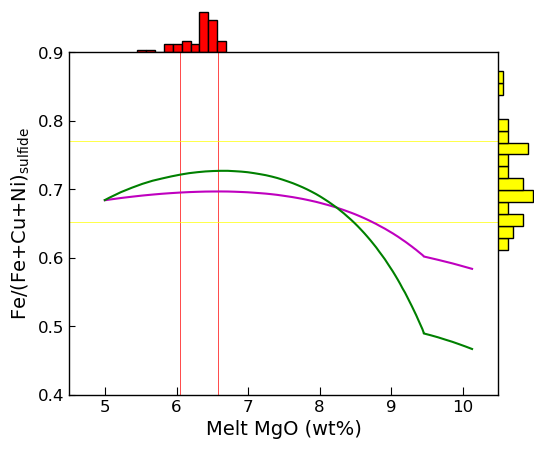

In [15]:
fig, (((ax3a),(ax3b)), ((ax4a, ax4b))) = plt.subplots(2, 2, figsize=(6,5),
                                    gridspec_kw={'height_ratios': [0.5, 4],
                                                 'width_ratios': [6, 0.5]
                                                })
plt.subplots_adjust(wspace=0, hspace=0)
ax3a.axis('off')
ax3b.axis('off')
ax4b.axis('off')

# Plot histogram of Mgo on ax3b
ax3a.hist(LG['MgO'],  ec='k', color='red')

# Plot histogram of sulifdes on ax3a
ax4b.hist(Sulfide_in['Fe/(Fe+Cu+Ni)'],  ec='k', 
          color='yellow', orientation='horizontal', bins=15)
# Plot models on Ax4a
ax4a.plot([np.nanmean(LG['MgO'])-np.nanstd(LG['MgO']),
           np.nanmean(LG['MgO'])-np.nanstd(LG['MgO'])],
                                           [0.4, 0.9], '-r', lw=0.5)
ax4a.plot([np.nanmean(LG['MgO'])+np.nanstd(LG['MgO']),
           np.nanmean(LG['MgO'])+np.nanstd(LG['MgO'])],
                                           [0.4, 0.9], '-r', lw=0.5)

ax4a.plot([4.5, 11],
 [np.nanmean(Sulfide_in['Fe/(Fe+Cu+Ni)'])+np.nanstd(Sulfide_in['Fe/(Fe+Cu+Ni)']),
 np.nanmean(Sulfide_in['Fe/(Fe+Cu+Ni)'])+np.nanstd(Sulfide_in['Fe/(Fe+Cu+Ni)'])],
          '-', color='yellow', lw=0.5)

ax4a.plot([4.5, 11],
 [np.nanmean(Sulfide_in['Fe/(Fe+Cu+Ni)'])-np.nanstd(Sulfide_in['Fe/(Fe+Cu+Ni)']),
 np.nanmean(Sulfide_in['Fe/(Fe+Cu+Ni)'])-np.nanstd(Sulfide_in['Fe/(Fe+Cu+Ni)'])],
          '-', color='yellow', lw=0.5)

ax4a.plot(ONeill_CalcSulf['MgO_Liq'], ONeill_CalcSulf['Fe_FeNiCu_Sulf_calc'], '-m')
ax4a.plot(Smythe_CalcSulf['MgO_Liq'], Smythe_CalcSulf['Fe_FeNiCu_Sulf_calc'], '-g')


ax3a.set_xlim([4.5, 10.5])
ax4a.set_xlim([4.5, 10.5])
ax4b.set_ylim([0.4, 0.9])
ax4a.set_ylim([0.4, 0.9])
ax4a.set_xlabel('Melt MgO (wt%)')
ax4a.set_ylabel('Fe/(Fe+Cu+Ni)$_{sulfide}$')
fig.savefig('SulfComp.png', dpi=200)
# Plot a fill between 

(array([3., 7., 5., 9., 3., 7., 4., 0., 0., 2.]),
 array([0.6116782 , 0.63777452, 0.66387084, 0.68996716, 0.71606347,
        0.74215979, 0.76825611, 0.79435243, 0.82044875, 0.84654507,
        0.87264138]),
 <BarContainer object of 10 artists>)

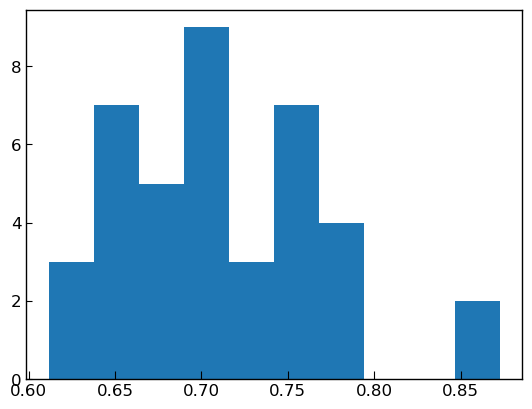

In [16]:
plt.hist(Sulfide_in['Fe/(Fe+Cu+Ni)'])

## Performing calculations using average measured sulfide content

In [17]:
Smythe_MeasSulf=ss.calculate_S2017_SCSS(df=Liqs, T_K=Liqs['T_K'], 
    Fe3Fet_Liq=Liqs['Fe3Fet_Liq'],                                         
P_kbar=3.2, Fe_FeNiCu_Sulf=np.nanmean(Sulfide_in['Fe/(Fe+Cu+Ni)']))

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


In [18]:
np.nanmean(Sulfide_in['Fe/(Fe+Cu+Ni)'])

0.7118088777396498

In [19]:
ONeill_MeasSulf=ss.calculate_O2021_SCSS(df=Liqs, T_K=Liqs['T_K'], 
P_kbar=3.2, 
Fe_FeNiCu_Sulf=np.nanmean(Sulfide_in['Fe/(Fe+Cu+Ni)']),
Fe3Fet_Liq=Liqs['Fe3Fet_Liq'])

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


In [20]:
# bit of S6+
s6_corr_10=1/(1-10/100)
s6_corr_10

1.1111111111111112

## Calculating fractional crystallization path

In [21]:
S_init=790
Calc_S_incom=ss.crystallize_S_incomp(S_init=S_init, F_melt=Liqs['Melt_%_magma']/100)
Calc_S_incom.head()

0    790.079008
1    798.020102
2    806.201424
3    814.467416
4    822.982677
Name: Melt_%_magma, dtype: float64

## Calculating amount of sulfide removed

In [22]:
np.nanmean(H14_Sulf['S'])*10000

338105.77250103315

In [27]:


S_Sulf=np.nanmean(H14_Sulf['S'])*10000
S_Sulf_Err=np.std(H14_Sulf['S'])*10000


S_Rem_ON_S2=ss.calculate_mass_frac_sulf(S_model=ONeill_MeasSulf['SCSS2_ppm'], 
                               S_init=S_init, 
                               F_melt=Liqs['Melt_%_magma']/100, 
                               S_sulf=S_Sulf)
S_Rem_ON_S6=ss.calculate_mass_frac_sulf(S_model=ONeill_MeasSulf['SCSS2_ppm']*s6_corr_10, 
                               S_init=S_init, 
                               F_melt=Liqs['Melt_%_magma']/100, 
                               S_sulf=S_Sulf)
S_Rem_Smythe=ss.calculate_mass_frac_sulf(S_model=Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017'], 
                               S_init=S_init, 
                               F_melt=Liqs['Melt_%_magma']/100, 
                               S_sulf=S_Sulf)

# Minus 1 sigma, if also do sigma on S, min value, max S in sulf
S_Rem_Smythe_minus1sig=ss.calculate_mass_frac_sulf(
S_model=Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017']-
Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
S_init=S_init, 
F_melt=Liqs['Melt_%_magma']/100, 
S_sulf=S_Sulf-S_Sulf_Err)


S_Rem_Smythe_plus1sig=ss.calculate_mass_frac_sulf(
S_model=Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017']+
Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
                               S_init=S_init, 
                               F_melt=Liqs['Melt_%_magma']/100, 
S_sulf=S_Sulf+S_Sulf_Err)

# To convert from mass to volume
M_Factor=(2804/4200)

(array([ 4.,  6.,  5.,  5.,  4., 10.,  2.,  0.,  3.,  1.]),
 array([31.8992569 , 32.33978008, 32.78030326, 33.22082644, 33.66134963,
        34.10187281, 34.54239599, 34.98291917, 35.42344236, 35.86396554,
        36.30448872]),
 <BarContainer object of 10 artists>)

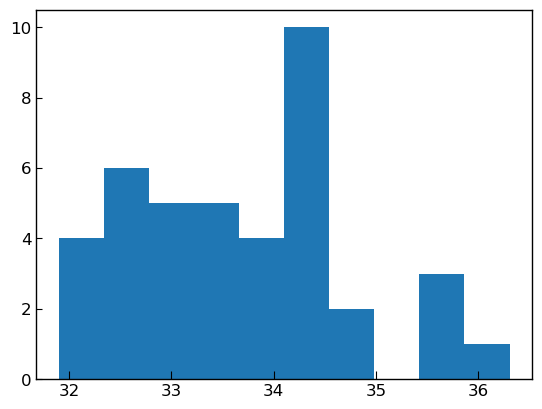

In [28]:
plt.hist(Sulfide_in['S'])

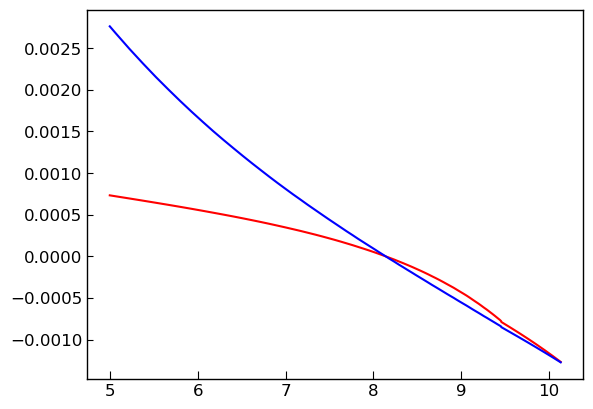

In [29]:
plt.plot(Liqs['MgO_Liq'],
        S_Rem_ON_S2, '-r')
plt.plot(Liqs['MgO_Liq'],
 (Calc_S_incom-ONeill_MeasSulf['SCSS2_ppm'])/(10000*np.nanmean(Sulfide_in['S'])),
         '-b')
X_Wieser= (Calc_S_incom-ONeill_MeasSulf['SCSS2_ppm'])/(10000*np.nanmean(Sulfide_in['S']))

In [30]:
S_Sulf=10000*np.nanmean(Sulfide_in['S'])
F=Liqs['Melt_%_magma']/100
S_init_Kisseva=S_Rem_ON_S2*S_Sulf+F*ONeill_MeasSulf['SCSS2_ppm']
S_init_Kisseva

0     791.693629
1     791.599443
2     791.505117
3     791.412515
4     791.319732
         ...    
72    789.140431
73    789.106497
74    789.071356
75    789.035554
76    789.021158
Length: 77, dtype: float64

In [31]:
S_init_Wieser=X_Wieser*S_Sulf+F*ONeill_MeasSulf['SCSS2_ppm']
S_init_Wieser

0      789.957134
1      785.890618
2      782.188195
3      778.928435
4      776.055608
         ...     
72    1297.652345
73    1343.686824
74    1394.417425
75    1449.950899
76    1472.550461
Length: 77, dtype: float64

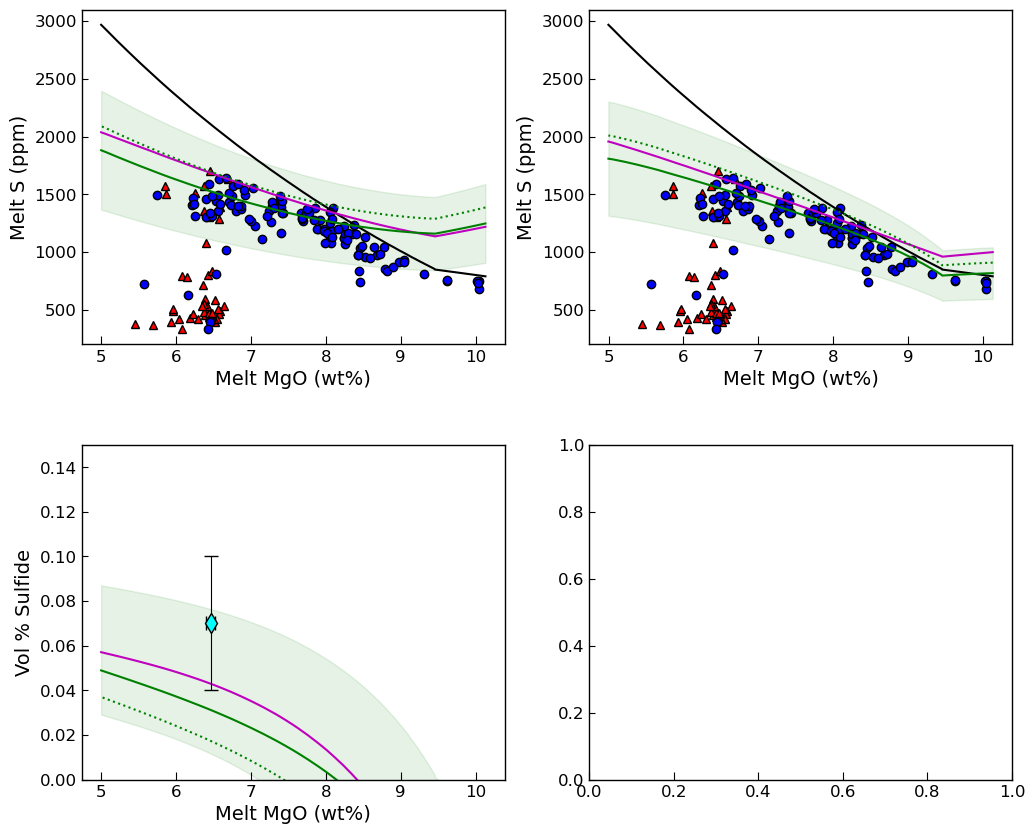

In [32]:
## Rset of the plots
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure here

# Fixed sulfide
ax0.plot(LG['MgO'], LG['S'], '^k', mfc='red', ms=6)
ax0.plot(BMI['MgO'], BMI['S-ppm'], 'ok', mfc='blue', ms=6)
ax0.plot(Liqs['MgO_Liq'], Calc_S_incom, '-k')
ax0.plot(ONeill_MeasSulf['MgO_Liq'], ONeill_MeasSulf['SCSS2_ppm'],
         '-m')
ax0.plot(Smythe_MeasSulf['MgO_Liq'], Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017'],
         '-g')
ax0.plot(Smythe_MeasSulf['MgO_Liq'], s6_corr_10*Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017'],
         ':g')
xfill=Smythe_MeasSulf['MgO_Liq']
y2fill_pap=(Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017']+
Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017_1sigma'])
y1fill_pap=(Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017']-
Smythe_MeasSulf['SCSS_ideal_ppm_Smythe2017_1sigma'])
ax0.fill_between(xfill, y1fill_pap, y2fill_pap, 
                 where=y1fill_pap < y2fill_pap, interpolate=True, 
                 color='green', alpha=0.1)

# Calculated sulfide
ax1.plot(LG['MgO'], LG['S'], '^k', mfc='red', ms=6)
ax1.plot(BMI['MgO'], BMI['S-ppm'], 'ok', mfc='blue', ms=6)
ax1.plot(Liqs['MgO_Liq'], Calc_S_incom, '-k')
ax1.plot(ONeill_CalcSulf['MgO_Liq'], ONeill_CalcSulf['SCSS2_ppm'],
         '-m')
ax1.plot(Smythe_CalcSulf['MgO_Liq'], Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
         '-g')
ax1.plot(Smythe_CalcSulf['MgO_Liq'], s6_corr_10*Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
         ':g')
xfill=Smythe_CalcSulf['MgO_Liq']
y2fill_pap=(Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017']+
Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017_1sigma'])
y1fill_pap=(Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017']-
Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017_1sigma'])
ax1.fill_between(xfill, y1fill_pap, y2fill_pap, 
                 where=y1fill_pap < y2fill_pap, interpolate=True, ec=None,
                 color='green', alpha=0.1)

## Amount of sulfide fractionated
ax2.plot(Liqs['MgO_Liq'], 100*S_Rem_ON_S2*M_Factor, '-g')
ax2.plot(Liqs['MgO_Liq'], 100*S_Rem_ON_S6*M_Factor, ':g')
ax2.plot(Liqs['MgO_Liq'], 100*S_Rem_Smythe*M_Factor, '-m')
xfill=Liqs['MgO_Liq']
y2fill_pap=100*S_Rem_Smythe_minus1sig*M_Factor
y1fill_pap=100*S_Rem_Smythe_plus1sig*M_Factor
ax2.fill_between(xfill, y1fill_pap, y2fill_pap, 
                 where=y1fill_pap < y2fill_pap, interpolate=True, ec=None,
                 color='green', alpha=0.1)
ax2.set_ylim([0, 0.1])
ax2.errorbar(np.nanmean(LG_14['MgO']), 
             0.07,
             xerr=np.nanstd(LG_14['MgO']),
             yerr=0.03,
           fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k', capsize=5)             

ax0.set_xlabel('Melt MgO (wt%)')
ax0.set_ylabel('Melt S (ppm)')
ax1.set_xlabel('Melt MgO (wt%)')
ax1.set_ylabel('Melt S (ppm)')
ax2.set_xlabel('Melt MgO (wt%)')
ax2.set_ylabel('Vol % Sulfide')
ax2.set_ylim([0, 0.15])
plt.subplots_adjust( hspace=0.3)
fig.savefig('Sulf_frac.png', dpi=200)

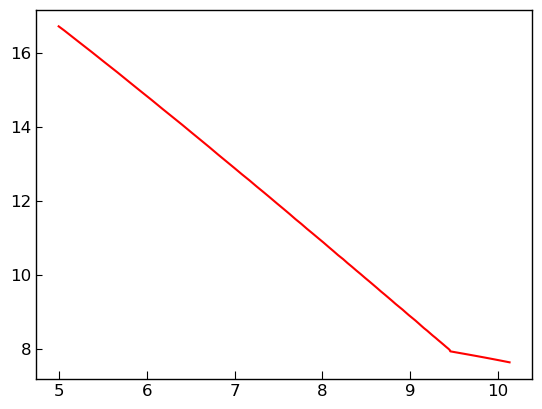

In [33]:
plt.plot(Liqs['MgO_Liq'], Liqs['FeOt_Liq'], '-r')

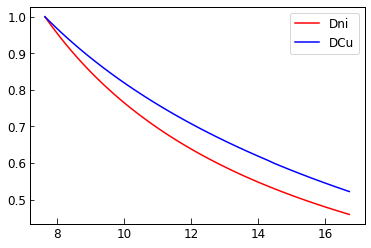

In [40]:
K_FeO=ss.calculate_Kiseeva_sulf_comp_kd(Ni_Sulf=np.nanmean(Sulfide_in['Ni']), 
                               Cu_Sulf=np.nanmean(Sulfide_in['Cu']), 
                               FeOt_Liq=Liqs['FeOt_Liq'], 
                               T_K=np.nanmean(Liqs['T_K']), Fe3Fet_Liq=0.1)
plt.plot(Liqs['FeOt_Liq'], K_FeO['DNi']/K_FeO['DNi'][0],  '-r', label='Dni')
plt.plot(Liqs['FeOt_Liq'], K_FeO['DCu']/K_FeO['DCu'][0], '-b', label='DCu')
plt.legend()

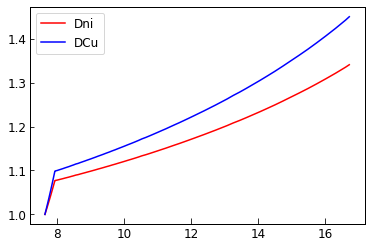

In [42]:
K_FeO=ss.calculate_Kiseeva_sulf_comp_kd(Ni_Sulf=np.nanmean(Sulfide_in['Ni']), 
                               Cu_Sulf=np.nanmean(Sulfide_in['Cu']), 
                               FeOt_Liq=np.nanmean(Liqs['FeOt_Liq']), 
                               T_K=Liqs['T_K'], Fe3Fet_Liq=0.1)
plt.plot(Liqs['FeOt_Liq'], K_FeO['DNi']/K_FeO['DNi'][0],  '-r', label='Dni')
plt.plot(Liqs['FeOt_Liq'], K_FeO['DCu']/K_FeO['DCu'][0], '-b', label='DCu')
plt.legend()

In [26]:
K_FeO

,S_Sulf,O_Sulf,Fe_Sulf,Ni_Sulf,Cu_Sulf,DNi,DCu,DAg,DPb,DZn,DCd,DTl,DMn,DIn,DTi,DGa,DSb,DCo,DV,DGe,DCr,DSe_B2015,DTe_B2015
0,33.442289,1.541592,60.476207,2.269956,2.269956,1760.918658,1078.534344,1320.153048,63.235605,2.573985,104.657038,14.991991,0.636055,20.419916,0.010247,0.038025,22.070096,87.802528,0.325959,0.641998,1.949053,1643.419357,15066.955296
1,33.428442,1.550047,60.481598,2.269956,2.269956,1751.307211,1074.386198,1315.280764,62.876184,2.560813,104.085937,14.943641,0.633195,20.269386,0.010202,0.037811,21.906236,87.296940,0.324170,0.636591,1.939169,1637.246238,15020.428026
2,33.414375,1.558637,60.487076,2.269956,2.269956,1741.649166,1070.203948,1310.368524,62.515018,2.547578,103.512067,14.894902,0.630322,20.118516,0.010157,0.037597,21.742010,86.788897,0.322379,0.631184,1.929238,1630.988261,14973.045098
3,33.400377,1.567184,60.492526,2.269956,2.269956,1732.143923,1066.074043,1305.517863,62.159562,2.534554,102.947276,14.846782,0.627495,19.970418,0.010113,0.037387,21.580800,86.288888,0.320620,0.625888,1.919465,1624.774886,14925.785012
4,33.386191,1.575847,60.498050,2.269956,2.269956,1722.616252,1061.920503,1300.639540,61.803264,2.521499,102.381153,14.798396,0.624662,19.822352,0.010069,0.037177,21.419627,85.787695,0.318863,0.620604,1.909669,1618.492037,14877.779188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,30.752795,3.183860,61.523432,2.269956,2.269956,855.105811,599.002787,756.774738,29.322828,1.340068,50.834570,9.449266,0.375836,8.147577,0.009105,0.021715,8.712247,40.100842,0.191203,0.251073,1.024278,710.944049,6056.063134
73,30.660884,3.239983,61.559221,2.269956,2.269956,840.273755,588.976587,744.951348,28.766578,1.320113,49.953256,9.333286,0.371923,7.983530,0.009220,0.021553,8.533585,39.318737,0.189958,0.246875,1.009363,688.046318,5804.030772
74,30.566169,3.297819,61.596101,2.269956,2.269956,825.517341,578.894798,733.057904,28.213086,1.300279,49.076435,9.216588,0.368057,7.821774,0.009347,0.021399,8.357399,38.540529,0.188785,0.242790,0.994543,665.036065,5550.931539
75,30.467616,3.357997,61.634474,2.269956,2.269956,810.702650,568.663354,720.983004,27.657324,1.280387,48.196152,9.098071,0.364206,7.660861,0.009489,0.021251,8.182110,37.759149,0.187677,0.238784,0.979683,641.717414,5294.818852


## Mass Balance functions

In [30]:
F=1/MELTS['Factor']

NameError: name 'MELTS' is not defined

In [31]:
def crystallize_S_incomp(S_init=1200, X_melt=None):
    S_melt_FC=S_init/X_melt
    return S_melt_FC

In [122]:
len(ONeill_CalcSulf['SCSS2_ppm'])

124

In [123]:
Calc_Mass=calculate_mass_frac_sulf(SCSS=ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn,
                         S_init=ONeill_CalcSulf['SCSS2_ppm'].iloc[0]*s6_corr_syn.iloc[0],
                         F=F,
                         S_sulf=np.mean(Sulfide_in['S'])*10000)

In [124]:
Liqs.columns

Index(['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq',
       'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq',
       'Ni_Liq_ppm', 'Cu_Liq_ppm', 'SiO2', 'TiO2', 'Al2O3', 'FeOt', 'MnO',
       'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'Temp (K) MELTS', 'FeO',
       'Fe2O3', 'H2O_Incom', 'Temp_HT1987_C', 'Factor', 'H2O_test',
       'temp_HT87', 'Ni_modelled', 'Cu_modelled', 'S6ST'],
      dtype='object')

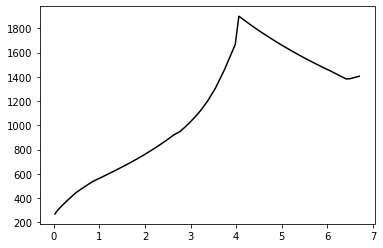

In [125]:
plt.plot(Liqs['MgO'],ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn, '-k')

In [126]:
np.mean(Sulfide_in['S'])*10000

283533.3333333334

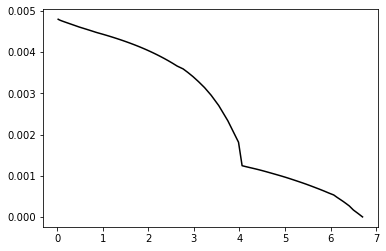

In [127]:
plt.plot(Liqs['MgO'],Calc_Mass, '-k')

In [132]:
Calc_Mass*320000

0         0.000000
1        26.251440
2        53.634342
3        85.125076
4       102.687897
          ...     
119    1531.406731
120    1532.251812
121    1533.063891
122    1534.049116
123    1535.303820
Length: 124, dtype: float64

## Amount of sulfide precipitated
- Can write as a mass balance.

S$_{Tot}$ = S$_{Melt}$* (2-X$_{sulf}$) + S$_{sulf}$*(X$_{sulf}$)

X$_{sulf}$ = (S$_{Tot}$  - S$_{Melt}$ )/(S$_{sulf}$ - S$_{Melt}$)

In [129]:
# Mean S in sulfide
S_sulf=np.mean(Sulfide_in['S'])*10000
S_sulf

283533.3333333334

In [130]:
X_sulf= (S_Incomp-ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn)/(S_sulf-ONeill_CalcSulf['SCSS2_ppm']*s6_corr_syn)

Text(0, 0.5, 'Sulf frac')

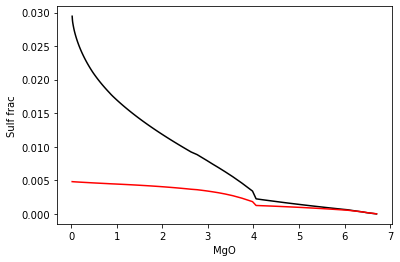

In [131]:
plt.plot(MELTS['MgO'], X_sulf, '-k')
plt.plot(MELTS['MgO'],Calc_Mass, '-r')
plt.xlabel('MgO')
plt.ylabel('Sulf frac')

## This needs work, but this is just a quick proof of concept
- have asked emma if she is interested in this

In [ ]:
# Steorological corrections from Higgins et al. (2000) - 

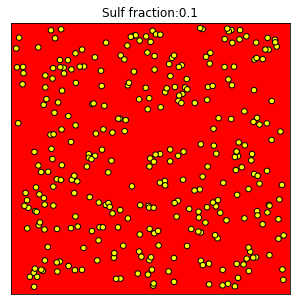

In [47]:
from matplotlib import patches
x_len_mm=1
y_len_mm=1
rect = patches.Rectangle((0,0),x_len_mm,y_len_mm,linewidth=1,edgecolor='r',facecolor='red', label='test')
fig, (ax1) = plt.subplots(1, 1, figsize=(5,5), sharey=True)
# Add the patch to the Axes
ax1.add_patch(rect)

area_rect=x_len_mm*y_len_mm
Vol_frac=0.1
area_sulf=area_rect*Vol_frac
sulf_rad=10*10**(-3)
area_1sulf=np.pi*sulf_rad**2
number_sulf=area_sulf/area_1sulf
circ1=patches.Circle((0.5, 0.5), sulf_rad, edgecolor='k', facecolor='yellow')
ax1.add_patch(circ1)
for i in range(0, int(np.round(number_sulf))):
    circ=patches.Circle((np.random.uniform(0.02, 0.98), np.random.uniform(0.02, 0.98)),
                        sulf_rad, edgecolor='k', facecolor='yellow')
    ax1.add_patch(circ)
    
ax1.set_title('Sulf fraction:' + str(Vol_frac))

ax1.axes.yaxis.set_visible(False)
ax1.axes.xaxis.set_visible(False)

In [20]:
np.round(number_sulf)

32.0